In [1]:
using PyPlot, StatsBase, Printf, DelimitedFiles;
using Revise;
using MDToolbox;
PyPlot.plt.style.use("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/Pcs5V/src/Revise.jl:1217
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


### Potential energy function

In [2]:
V(x; k=1.0) = sum(- (1.0 / 2.0) .* k .* x.^2 .+ (1.0 ./ 4.0) .* k .* x.^4)
V([0.0], k=1.0)

0.0

### Proposal distribution

In [3]:
proposal_fun(x) = x .+ (rand(Float64, size(x)) .* 2.0 .- 1.0);
proposal_fun([0.0])

1-element Array{Float64,1}:
 -0.23816843326389892

### Markov Chain Monte Carlo (MCMC)

In [45]:
nstep = 100000;
temperature = 0.03;

x = [0.0]

io = open("single.dat", "w")

for istep = 2:nstep
    x = propagate_mcmc(y -> V(y, k=1.0), proposal_fun, x, temperature, io=io);
end

close(io)

### Trajectory analysis

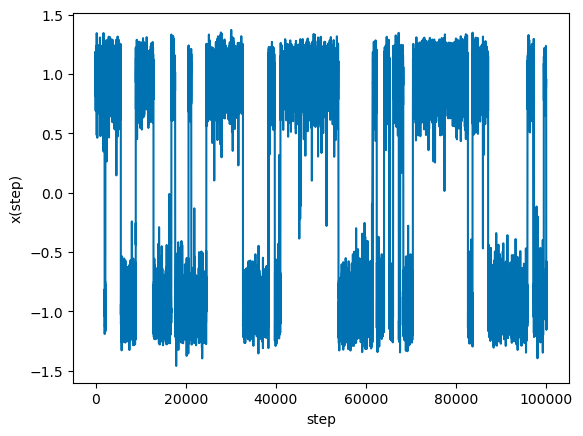

PyObject Text(24.000000000000007, 0.5, 'x(step)')

In [46]:
data = readdlm("single.dat");
traj_temp = data[:, 1]
traj = data[:, 2]

plot(traj)
xlabel("step")
ylabel("x(step)")

In [47]:
x_grid = range(-1.3, 1.3, length=100);
pmf_theory = V.(x_grid, k=1) ./ temperature[1]
pmf_theory .= pmf_theory .- minimum(pmf_theory);

In [48]:
pmf_observed, _ = getpmf(traj, grid_x = collect(x_grid), bandwidth=0.05);

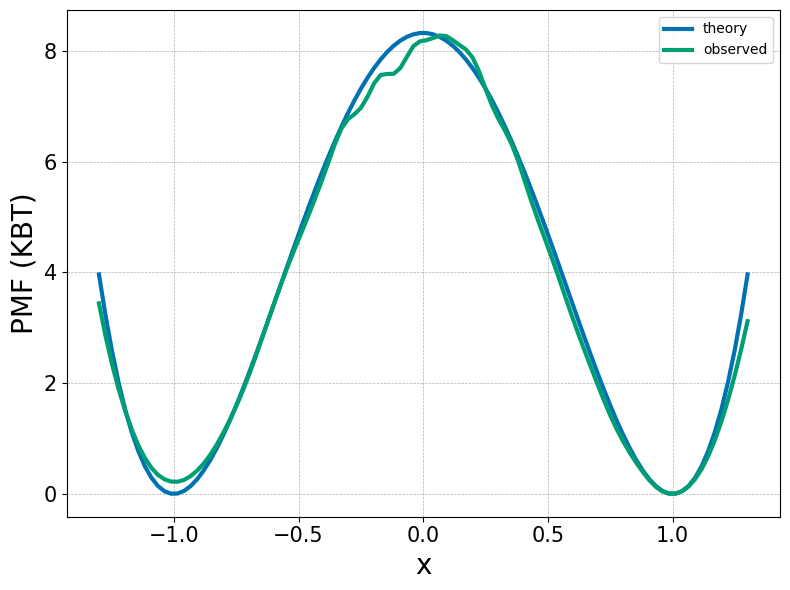

In [49]:
fig, ax = subplots(figsize=(8, 6))
ax.plot(x_grid, pmf_theory, linewidth=3)
xlabel("x",fontsize=20)
ylabel("PMF (KBT)",fontsize=20)

ax.plot(x_grid, pmf_observed, linewidth=3)

ax.legend(["theory", "observed"])

ax.xaxis.set_tick_params(which="major",labelsize=15)
ax.yaxis.set_tick_params(which="major",labelsize=15)
ax.grid(linestyle="--", linewidth=0.5)
tight_layout()
savefig("mcmc_single.png", dpi=350)